In [10]:
class Student:
    # 항상 메서드의 첫 번째 인자는 self이다.

    
    def __init__(self): # 생성자.
        print('인스턴스가 생성되었습니다')

    def __del__(self):  # 소멸자. - 인스턴스가 소멸될 때 호출되는 메서드
        print('인스턴스가 소멸되었습니다.')

    def disp(self):
        print("인스턴스 메서드")

    def setName(self,name):
        self.name = name
    
    def getName(self):
        return self.name
    


stu1 = Student() # 인스턴스 생성

Student.disp(stu1) # 클래스가 인스턴스의 메서드를 직접 호출 - unbound 호출
stu1.disp() # self 에 인스턴스가 대입되서 메서드를 호출 - bound 호출

stu1.setName('havi')
stu1.getName()

인스턴스가 생성되었습니다
인스턴스가 소멸되었습니다.
인스턴스 메서드
인스턴스 메서드


'havi'

In [16]:
class Student:
    def __init__(self,name='noname'): # name의 default 값 설정 -> noname, 클래스의 인자를 주면 그 값으로 name으로 들어가고, 인자를 주지않으면 default값이 들어간다.
                                      # 인자의 데이터가 많다면, args로 만든다.
        print('인스턴스가 생성되었습니다.')
        self.name = name

stu1 = Student('havi')
stu1.name # name출력

인스턴스가 생성되었습니다.


'havi'

In [17]:
class Student:

    # 새 인스턴스가 생성될 때 마다 증가함.
    auto_increment = 0  #클래스 속성 - 클래스에 1 개만 생성, 클래스 속성은 모든 인스턴스가 공유한다. 그래서 1이 저장되고 1에다 1을 더하면 2가됨.
    
    def __init__(self):
        Student.auto_increment+=1
        print(Student.auto_increment)

stu1 = Student()
stu2 = Student()


1
2


In [26]:
class Student:
    def __del__(self):
        print('인스턴스가 소멸되었습니다.')

    

stu1 = Student() # 인스턴스가 생성되고, 참조 카운트가 1 이된다.
stu1 = None # 참조를 기리키는 변수에 None을 대입하면 참조 카운트가 1 감소
# 참조 카운트가 0 이면 인스턴스가 소멸된다.

stu2 = Student() # 참조 카운트 1
stu3 = stu2 # 참조카운트 2
stu2 = None # 참조카운트 1 이라서, 인스턴스는 소멸되지 않는다.
print('프로그램 종료')


인스턴스가 소멸되었습니다.
인스턴스가 소멸되었습니다.
프로그램 종료


In [28]:
# staticmethod 
class Student:
    # 인자가 필요없음
    def method():
        print('인자가 필요없는 static method')

# 인스턴스 생성없이, 사용할 수 있음.
Student.method()

인자가 필요없는 static method


In [29]:
## 속성 생성 제한 : __slots__

class Student:
    __slots__ = ['name','age'] ## name과 age 속성만 사용하도록 제한

stu1 = Student()
stu1.name ='havi'
stu1.age=25
stu1.job='student' # __slots__ 에, name과 age만 사용하기로 제한 했으며, job을 사용하여 에러가남

AttributeError: 'Student' object has no attribute 'job'

In [30]:
## private 

class Student:
    def __init__(self):
        self.name = 'havi'
        self.__no = 1 # 속성을 만들 때 __ 로 시작하면 인스턴스는 속성에 직접 접근 불가

stu1 = Student()
print(stu1.name)
print(stu1.__no)


havi


AttributeError: 'Student' object has no attribute '__no'

In [40]:
# ver1 . property

class Student:

    @property  # getter설정
    def name(self):
        print('getter에서 호출')
        return self.__name

    @name.setter
    def name(self,name):
        print('setter에서 호출')
        self.__name = name




    
stu = Student()
# print(stu.getName())
# property 를 통해, name속성을 호출할 수 있다.
# 속성을 직접호출하는 것이 아니라, property를 통해 호출한다.
stu.name='havi'
print(stu.name)



setter에서 호출
getter에서 호출
havi


In [44]:
# ver2. property

class Student:

    @property
    def name(self):
        print('getter에서 호출')
        return self.__name

    @name.setter
    def name(self,name):
        print('setter에서 호출')
        self.__name = name


    
 

    
stu = Student()
stu.name='havi'
print(stu.name)



setter에서 호출
getter에서 호출
havi


In [50]:
# 연산자 오버로딩
class Student:
    def __init__(self,name):
        self.name = name

    # + 연산자 오버로딩
    def __add__(self,other):
        return self.name + other.name
    

    # == 연산자 오버로딩
    def __eq__(self,other):
        return self.name == other.name
        
s1 = Student('마포구')
s2 = Student('합정동')
print(s1+s2)
print(s1==s2)
print(s1 is s2)

마포구합정동
False
False


In [55]:
# 상속
class Sup:

    # name이라는 속성이 생겼다.
    def __init__(self):
        self.name = 'noname'

    def superMethod(self):
        print('상위클래스의 메서드')

class Sub(Sup):
    def subMethod(self):
        print('하위클래스의 메서드')

s = Sub()
s.subMethod()
s.superMethod()
print(s.name)

하위클래스의 메서드
상위클래스의 메서드
noname


In [62]:
# 상속
class Sup:

    # name이라는 속성이 생겼다.
    def __init__(self):
        self.name = 'noname'

    def superMethod(self):
        print('상위클래스의 메서드')

class Sub(Sup):
    
    # 상위 클래스에 score가 없기 때문에 & 
    # 하위 클래스에서 __init__를 생성하면 상위 클래스의 __init__을 호출하지 않는다,
    # 하위 클래스에 __init__를 만들 땐, 상위클래스의 __init__을 호출해주어야한다.
    def __init__(self):
        # 하위 클래스에 __init__을 넣을 땐, super().__init__() 을 포함하여, 상위 클래스의 __init__을 상속 받는다
        super().__init__()
        self.score = 80

    def subMethod(self):
        print('하위클래스의 메서드')

s = Sub()
s.subMethod()
s.superMethod()
print(s.name)
print(s.score)

하위클래스의 메서드
상위클래스의 메서드
noname
80


In [65]:
# Method Overriding (재정의)

class Sup:
    def method(self):
        print('상위 클래스의 메서드')

class Sub(Sup):
    # 상위 클래스에 존재하는 메서드를 하위 클래스에서 다시 정의 - overriding
    # 목적은 기능 확장

    def method(self):
        super().method() # 상위 클래스의 메서드 호출
        print("하위 클래스의 메서드")

s = Sub()
s.method()

상위 클래스의 메서드
하위 클래스의 메서드


In [68]:
# Abstract 추상
import abc

class Sup(metaclass = abc.ABCMeta):
    @abc.abstractclassmethod # 추상 method를 만들 때, 위에 @abstractmethod를 붙여서 추상 method로 지정한다.
    def method(self):
        pass

# Sup 클래스를 상속 받음
class Sub(Sup):
    # 상위 클래스인 Sup의 method 메서드를 재정의함.
    def __init__(self):
        print('하위 클래스 생성')

    def method(self):
        print("추상 메서드 재정의완료")

c = Sub()
c.method()

하위 클래스 생성
추상 메서드 재정의완료


In [73]:
import sys
print(sys.modules)
print(sys.path)

{'sys': <module 'sys' (built-in)>, 'builtins': <module 'builtins' (built-in)>, '_frozen_importlib': <module '_frozen_importlib' (frozen)>, '_imp': <module '_imp' (built-in)>, '_thread': <module '_thread' (built-in)>, '_warnings': <module '_warnings' (built-in)>, '_weakref': <module '_weakref' (built-in)>, '_io': <module '_io' (built-in)>, 'marshal': <module 'marshal' (built-in)>, 'nt': <module 'nt' (built-in)>, 'winreg': <module 'winreg' (built-in)>, '_frozen_importlib_external': <module '_frozen_importlib_external' (frozen)>, 'time': <module 'time' (built-in)>, 'zipimport': <module 'zipimport' (frozen)>, '_codecs': <module '_codecs' (built-in)>, 'codecs': <module 'codecs' from 'c:\\Users\\USER\\anaconda3\\lib\\codecs.py'>, 'encodings.aliases': <module 'encodings.aliases' from 'c:\\Users\\USER\\anaconda3\\lib\\encodings\\aliases.py'>, 'encodings': <module 'encodings' from 'c:\\Users\\USER\\anaconda3\\lib\\encodings\\__init__.py'>, 'encodings.utf_8': <module 'encodings.utf_8' from 'c:\\

In [72]:
import os
os.getcwd()

'c:\\Users\\USER\\Desktop\\vscode Workspace\\DX_DATA_Python\\0711'

In [74]:
import other
other.mypi

3.14

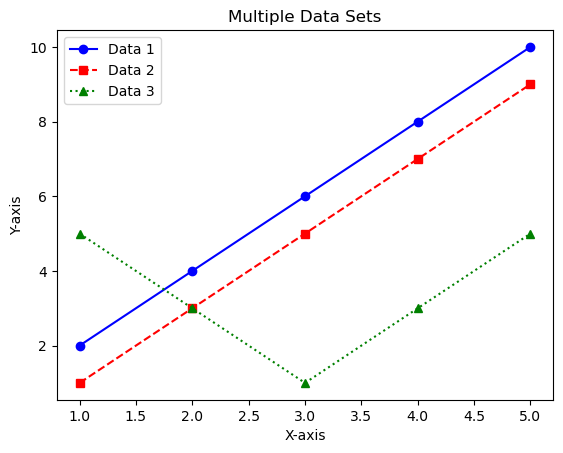

In [3]:
import matplotlib.pyplot as plt

# Data
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]
y2 = [1, 3, 5, 7, 9]
y3 = [5, 3, 1, 3, 5]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(x, y1, color='blue', linestyle='-', marker='o', label='Data 1')
ax.plot(x, y2, color='red', linestyle='--', marker='s', label='Data 2')
ax.plot(x, y3, color='green', linestyle=':', marker='^', label='Data 3')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Multiple Data Sets')

# Add a legend
ax.legend()

# Show the graph
plt.show()


In [6]:
print((1234.567+45.12345)+0.4578)
print(1234.567+(45.12345+0.4578))


1280.14825
1280.14825


In [8]:
from decimal import Decimal
print(0.2 ==(1.0-0.8))
print(Decimal('0.2') ==Decimal('1.0')-Decimal('0.8'))


False
True
